# Atividade LAB - Aula 4

Você deve definir o melhor trajeto de uma aeronave na entrega de suprimentos, admitindo que existem 7 bases. Nesse cenário, a aeronave deve percorrer todas as bases pelo melhor caminho possível, sendo que o menor caminho é o mais viável.

💡Econômia inteligente de bateria deve ser trabalhada

Use Algoritmo Genético para resolver esse problema.

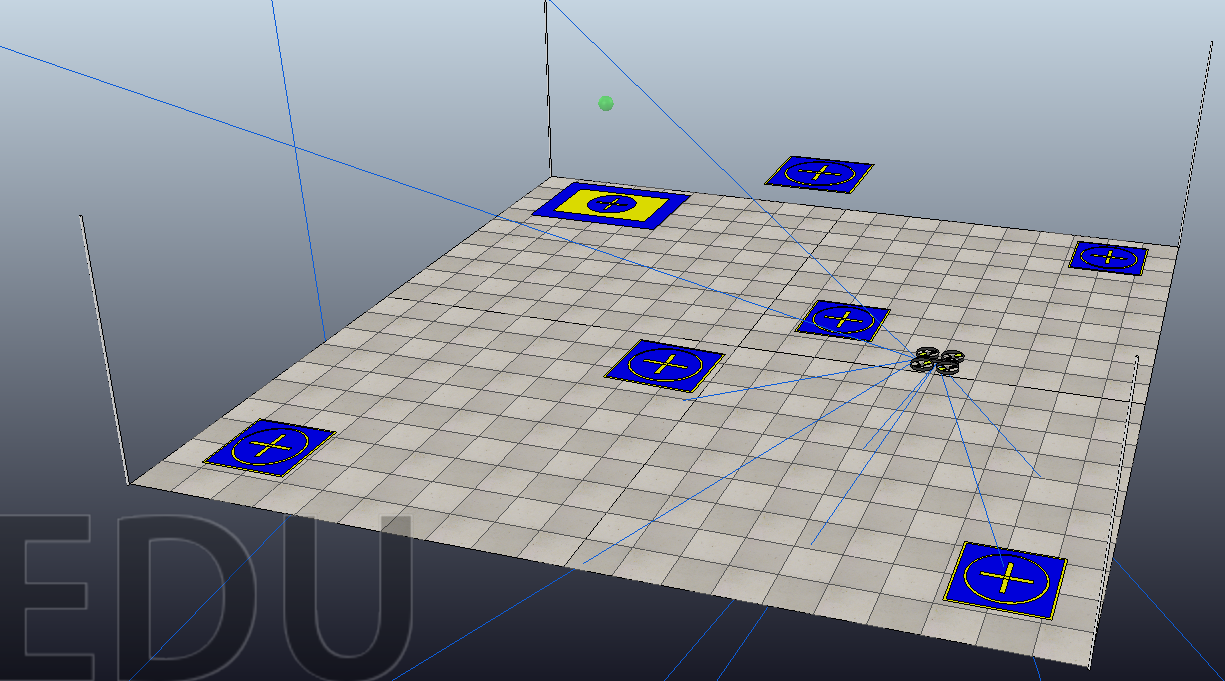

🔴 Não será necessário rodar a simulação em ambiente virtual.

Porém .....

[Simulador](https://www.coppeliarobotics.com/)


In [ ]:
## Baixar Cena (APENAS SE QUISER TESTAR NO SIMULADOR)
import requests

def download_file(url, filename):
  try:
    response = requests.get(url, stream=True)
    response.raise_for_status()

    with open(filename, 'wb') as file:
      for chunk in response.iter_content(chunk_size=8192):
        file.write(chunk)
    print(f"File '{filename}' downloaded successfully.")

  except requests.exceptions.RequestException as e:
    print(f"Error downloading file: {e}")

file_url = "https://raw.githubusercontent.com/AdsonNAlves/scenarios_coppelia_uav/master/scenario_free_short.ttt"
file_name = "scenario_free_short.ttt"
download_file(file_url, file_name)

File 'scenario_free_short.ttt' downloaded successfully.


## ATIVIDADE

Considerere as seguintes referências.

```
          ,x,      y,     z
p1,   -2.750, -1.700, 0.100
p2,    1.250,  4.899, 1.000
p3,    0.180,  2.774, 2.550
p4,   -2.750,  6.400, 0.100
p5,    5.300,  6.375, 0.100
p6,    0.250,  1.400, 0.100
p7,    4.775, -1.525, 0.100
```


Passo 0 -> Exemplo de Caminho [p1, p2, p3, p4, p5, p6, p7] <- Individuo 

Passo 1 - Definir a quantidade de individuos da sua população Ex:(6)

Passo 2 - Gerar de forma random caminhos prováveis Ex: (6 caminhos)

Passo 3 - Identificar o valor de aptidão de cada Individuo(Valor de Caminho/ Trajeto)

Passo 4 - Organizar do menor valor para maior valor (distancia total percorrida)

Passo 5 - Escolher 2 Individuos com os menores valores (distancia total percorrida) 

Passo 6 - Fazer o crossover com os 2 individuos. Para isso definir um ponto de crossover de forma 
randomica e gerar a permutação dos valores a direta da lista que representa o caminho. (ATENÇÃO, NAO PODE TER "P" REPETIDO)

PASSO 7 - FAZER A MUTAÇÃO (SORTEAR PONTOS RANDOMICAMENTE)

PASSO 8 - Identificar o valor de aptidão dos novos Individuos(filhos)

Passo 9 - Identificar os individuos com menor aptidão (caminho mais longo) e substitui-los pelos caminhos filhos gerados

Passo 10 - Verificar criterio de parada (quant. de iterações | Valor da distancia < que X)

Passo 11 - Se o criterio atendeu parar treinamento

In [17]:
import random, math

# ----------------------------
# Definição dos pontos (Passo 0: Exemplo de caminho)
# Exemplo: [p1, p2, p3, p4, p5, p6, p7]
# ----------------------------
pontos = {
  'p1': (-2.750, -1.700, 0.100),
  'p2': (1.250, 4.899, 1.000),
  'p3': (0.180, 2.774, 2.550),
  'p4': (-2.750, 6.400, 0.100),
  'p5': (5.300, 6.375, 0.100),
  'p6': (0.250, 1.400, 0.100),
  'p7': (4.775, -1.525, 0.100)
}

# ----------------------------
# Passo 2: Geração da população inicial
# Cria uma população de caminhos (indivíduos) com permutações aleatórias dos pontos
# ----------------------------
def gerar_populacao(tamanho_populacao):
  individuos = []
  lista_pontos = list(pontos.keys())
  for _ in range(tamanho_populacao):
    individuo = lista_pontos[:]
    random.shuffle(individuo)
    individuos.append(individuo)
  return individuos

def calcular_distancia(ponto1, ponto2):
  return math.sqrt((ponto1[0] - ponto2[0])**2 + (ponto1[1] - ponto2[1])**2 + (ponto1[2] - ponto2[2])**2)

# ----------------------------
# Passo 3: Função de aptidão
# Calcula a distância total percorrida do caminho (menor distância = melhor aptidão)
# ----------------------------
def fitness(caminho):
  distancia_total = 0
  for i in range(len(caminho) - 1):
    distancia_total += calcular_distancia(pontos[caminho[i]], pontos[caminho[i+1]])
  # Para um circuito fechado (retornar ao ponto inicial), descomente a linha abaixo:
  # distancia_total += calcular_distancia(pontos[caminho[-1]], pontos[caminho[0]])
  return distancia_total

# ----------------------------
# Passo 6: Operador Crossover
# Crossover entre dois pais utilizando um ponto de corte aleatório
# Gera um filho garantindo que não haja pontos repetidos
# ----------------------------
def crossover(pai1, pai2):
  tamanho = len(pai1)
  ponto_corte = random.randint(1, tamanho - 2)
  filho = pai1[:ponto_corte]
  for gene in pai2:
    if gene not in filho:
      filho.append(gene)
  return filho

# ----------------------------
# Passo 7: Operador Mutação
# Com uma certa probabilidade, troca dois genes aleatoriamente para introduzir diversidade
# ----------------------------
def mutacao(individuo, taxa_mutacao):
  individuo_mutado = individuo[:]  # Cópia do indivíduo original
  if random.random() < taxa_mutacao:
    idx1, idx2 = random.sample(range(len(individuo)), 2)
    individuo_mutado[idx1], individuo_mutado[idx2] = individuo_mutado[idx2], individuo_mutado[idx1]
  return individuo_mutado

def calcula_melhor_caminho(tamanho_populacao, iteracoes, taxa_mutacao):
  # Passo 1: Definir a quantidade de indivíduos da população
  populacao = gerar_populacao(tamanho_populacao)
  melhor_individuo_global = None
  melhor_fitness = float('inf')

  # Passo 10: Verificar critério de parada (quantidade de iteracoes)
  for it in range(iteracoes):
    # Passo 4: Organizar a população do menor para o maior valor (distância total percorrida)
    populacao.sort(key=lambda ind: fitness(ind))
    melhor_individuo_atual = populacao[0]
    atual_fitness = fitness(melhor_individuo_atual)
    
    if atual_fitness < melhor_fitness:
      melhor_individuo_global = melhor_individuo_atual
      melhor_fitness = atual_fitness
    
    print(f"Iteração {it}: Melhor distância = {atual_fitness:.2f}")

    # Passo 10: Verificar critério de parada (condicional de distância menor que um limite)
    # if melhor_fitness < LIMITE_DISTANCIA:
    #     break

    # Passo 5: Selecionar os 2 melhores indivíduos (com menor distância)]
    # pai1 = melhor_individuo_atual
    pai2 = populacao[1]
    
    # Passo 6: Realizar o crossover para gerar filhos
    filho1 = crossover(melhor_individuo_atual, pai2)
    filho2 = crossover(pai2, melhor_individuo_atual)
    
    # Passo 7: Aplicar mutação nos filhos
    filho1 = mutacao(filho1, taxa_mutacao)
    filho2 = mutacao(filho2, taxa_mutacao)
    
    # Passo 8: (Indiretamente) A aptidão dos novos indivíduos será calculada na próxima iteração
    
    # Passo 9: Substituir os indivíduos com pior aptidão pelos filhos gerados
    populacao[-1] = filho1
    populacao[-2] = filho2

  # Passo 11: Critério de parada atendido, retorna o melhor indivíduo encontrado
  return melhor_individuo_global, melhor_fitness

# ----------------------------
# Parâmetros do Algoritmo Genético
# ----------------------------
# Passo 1: Definir a quantidade de indivíduos da população
tamanho_populacao = 6

# Definir o número de iterações (critério de parada)
iteracoes = 100000

# Taxa de mutação (ex.: 10% de chance de ocorrer mutação)
taxa_mutacao = 1

# Chama funcao principal
melhor_rota, distancia_total = calcula_melhor_caminho(tamanho_populacao, iteracoes, taxa_mutacao)

print("Melhor rota encontrada:", melhor_rota)
print("Distância total:", distancia_total)

Iteração 0: Melhor distância = 32.39
Iteração 1: Melhor distância = 32.39
Iteração 2: Melhor distância = 32.19
Iteração 3: Melhor distância = 32.19
Iteração 4: Melhor distância = 32.19
Iteração 5: Melhor distância = 32.19
Iteração 6: Melhor distância = 32.19
Iteração 7: Melhor distância = 32.19
Iteração 8: Melhor distância = 32.19
Iteração 9: Melhor distância = 32.19
Iteração 10: Melhor distância = 32.19
Iteração 11: Melhor distância = 32.19
Iteração 12: Melhor distância = 32.19
Iteração 13: Melhor distância = 32.19
Iteração 14: Melhor distância = 32.19
Iteração 15: Melhor distância = 32.19
Iteração 16: Melhor distância = 32.19
Iteração 17: Melhor distância = 32.19
Iteração 18: Melhor distância = 32.19
Iteração 19: Melhor distância = 32.19
Iteração 20: Melhor distância = 32.19
Iteração 21: Melhor distância = 32.19
Iteração 22: Melhor distância = 30.30
Iteração 23: Melhor distância = 30.30
Iteração 24: Melhor distância = 30.30
Iteração 25: Melhor distância = 30.30
Iteração 26: Melhor di